<a href="https://colab.research.google.com/github/KiariWilliams/E-News-Express-Case-Study/blob/main/Kiari_Williams_Project2_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study E-news Express

## Problem Statement
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline and recommended content to keep customers engaged long enough to make a decision to subscribe.

## Objectives
The design team of the company has researched and created a new landing page that has a new outline and more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. 

The task is to perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?


### Data Dictionary

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats

#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/UT_DS_Program

## Reading the Data into a DataFrame

In [4]:
# read the data
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

In [5]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
# examining the last 5 rows of data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
# count of rows and columns in dataframe
df.shape

(100, 6)

In [8]:
# examining data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
# gathering statistical summary of data
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Observations:
*     There are no null values in this data set. There are no missing values to replace.
*     There are 100 rows and 6 columns. 
*     Each column has the correct data type.
*     Users spend an average of 5 minutes on the landing page. The minimum time spent was .19 and the longest time spent was 10.71 minutes.

### Univariate Analysis

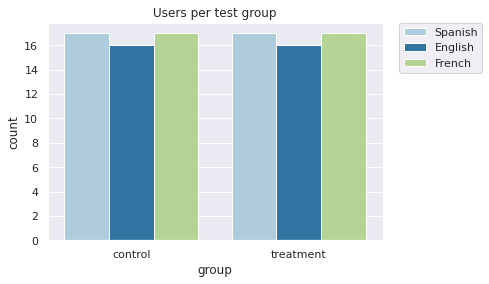

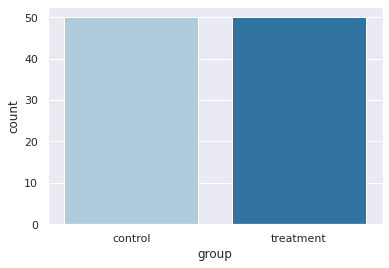

In [10]:
# count of users per test group
sns.set(style = 'darkgrid', palette= 'Paired')
sns.countplot(data = df, x = 'group', hue = 'language_preferred');
# place legend out side of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Users per test group')
plt.show()

sns.countplot(data=df, x='group')
plt.show()

Observations:
*    Control and treatment groups are even in user count and demographics.

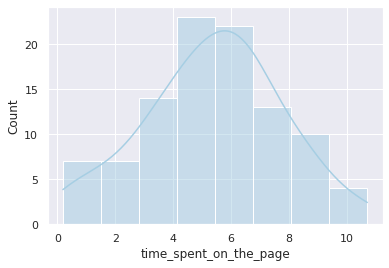

In [11]:
# time spent on landing page frequency

sns.histplot(data = df, x = 'time_spent_on_the_page', kde = True);
plt.show()

Observations:
*     Time spent on the landing page follows a normal distribution.
*     Average time spent is 5 minutes.

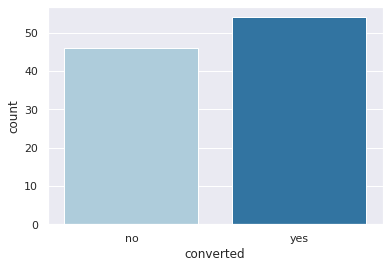

In [12]:
# converted vs non
sns.countplot(data=df, x='converted');
plt.show()

Observations:
*     More users have converted to become E-News subcsribers.

### Bivariate Analysis

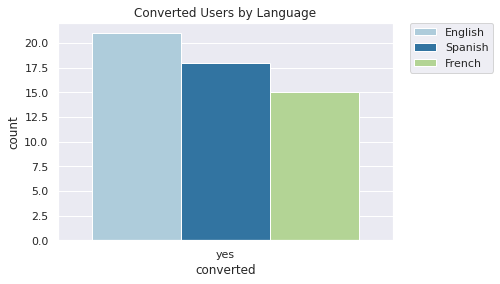

In [13]:
# Preferred language by converted users
subscribers = df[df['converted']== 'yes']

sns.countplot(data= subscribers, x= 'converted', hue='language_preferred');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Converted Users by Language')
plt.show()

Observations:
*     Most users that subsribed to E-News have English as their preferred language. 
*     French speakers have the least conversions.

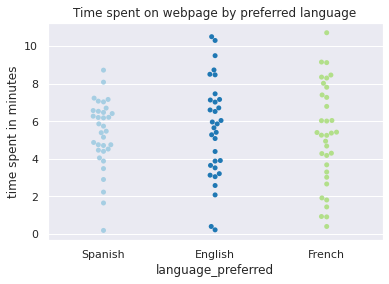

In [14]:
# time spent on landing page by preferred language

sns.swarmplot(data=df,x='language_preferred', y='time_spent_on_the_page', dodge=True);
plt.ylabel('time spent in minutes')
plt.title('Time spent on webpage by preferred language')
plt.show()

In [15]:
# calculating average by language

lang_page_view = df.groupby('language_preferred')['time_spent_on_the_page'].describe()
lang_page_view

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,32.0,5.559063,2.621079,0.22,3.6175,5.755,7.1375,10.50
French,34.0,5.253235,2.675413,0.40,3.3950,5.315,7.3675,10.71
Spanish,34.0,5.331765,1.818095,0.19,4.4750,5.605,6.5150,8.72


Observations:
*     English speakers spend more time on the page on average.
*     Spanish speakers tend spend less time on the page overall, the maximum time a Spanish-speaking user spent on the page was 8.72min. 

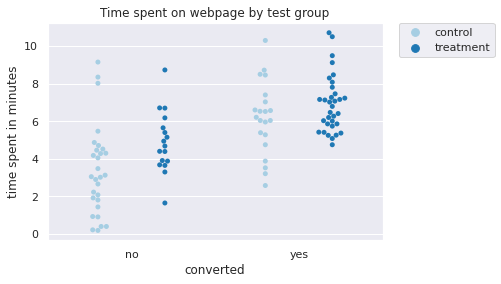

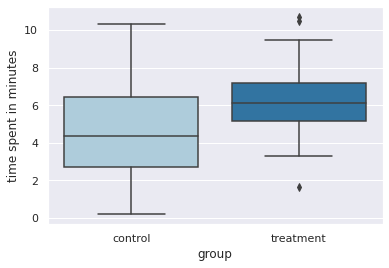

In [16]:
# correlation between time spent on the landing page by users

sns.swarmplot(data=df,x='converted', y='time_spent_on_the_page', hue='group', dodge=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.ylabel('time spent in minutes')
plt.title('Time spent on webpage by test group')
plt.show()

# Time spent on the landing page per group
sns.boxplot(data=df, y='time_spent_on_the_page', x='group');
plt.ylabel('time spent in minutes')
plt.show()

Observations:
*     Users that received the new landing page in the treatment group spent more time on the page on average than users that were given the old E-News landing page.
*     More users converted after spending more time on the page in each group in general.

## 1. Do the users spend more time on the new landing page than the existing landing page?

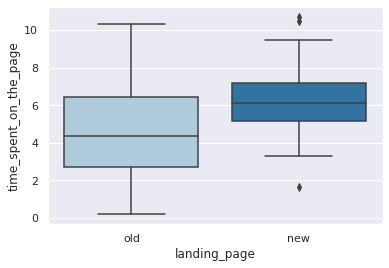

In [17]:
# time spent on new and old landing page

sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');
plt.show()

Observations:
*    Users that recieved the new landing page spend 6 minutes on it on average, which is higher than users that recieved the old landing page.

### Define the null and alternate hypotheses

H0: μ1 = μ2 , Users spend the same time on the new landing page as the existing one.

Ha: μ1 < μ2 , Users spend more time on the new landing page than the exisiting one.

### Select Appropriate test

Paired test for equality of means

### Decide the significance level

alpha = 0.05

### Collect and prepare data

In [18]:
treatment= df[df['landing_page'] == 'new']
control= df[df['landing_page'] == 'old']

### Calculate the p-value

In [19]:
from scipy.stats import ttest_rel

test_stat, p_value = ttest_rel(treatment['time_spent_on_the_page'], control['time_spent_on_the_page'])
print('The p_value is', p_value)

The p_value is 0.0005982180187407595


### Compare the p-value with $\alpha$

In [20]:
alpha = 0.05
if p_value < alpha:
  print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### Draw inference

As the p_value is less than the level of significance, we can reject the null hypothesis. Therefore, we can conclude that there is enough statistical evidence to say that users spend more time on the new landing page than the existing one.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [21]:
# calculate the conversion rate
#convers / the total number of interactions

converts = df[df['converted']== 'yes']['user_id'].count()
total_participants = df.shape[0]
conversion_rate = converts/total_participants

print('The conversion rate for new subscribers to E-News is', conversion_rate * 100, '%')

The conversion rate for new subscribers to E-News is 54.0 %


## 3. Are conversion and preferred language independent or related?

Ho: Conversion and preferred languare are independent

Ha: Conversion and preferred language are dependent.

In [22]:
# create numeric data frame out of categorical variable
encoded_df = df.iloc[:, 1:6]
encoded_df= encoded_df[['group','landing_page','converted','language_preferred']].astype('category')

encoded_df.dtypes

group                 category
landing_page          category
converted             category
language_preferred    category
dtype: object

In [23]:
# encode categorical variables to numerical codes
encoded_df['group_code']= encoded_df['group'].cat.codes
encoded_df['page_code']= encoded_df['landing_page'].cat.codes
encoded_df['converted_code']= encoded_df['converted'].cat.codes
encoded_df['language_code'] = encoded_df['language_preferred'].cat.codes

#drop original columns
encoded_df.drop(['group','landing_page','converted','language_preferred'], axis=1, inplace=True)

encoded_df.head()

,group_code,page_code,converted_code,language_code
0,0,1,0,2
1,1,0,1,0
2,1,0,0,2
3,0,1,0,1
4,1,0,1,2


In [24]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(encoded_df)

print('The p_value is', p_value)

alpha = 0.05
if p_value < alpha:
  print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The p_value is 0.999973102524537
We fail to reject the null hypothesis


Observations:
*     Based on the p_value, we fail to reject the null. There is statistical evidence to conclude language and conversion are independent.

## 4. Is the time spent on the new page same for the different language users?

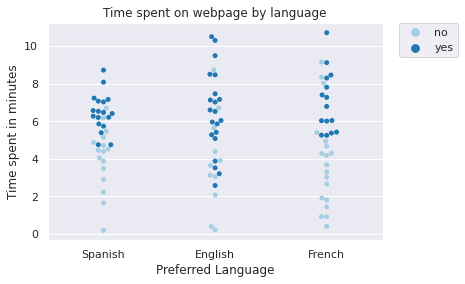

In [25]:
# Time spent on new page per language
sns.swarmplot(data=df,x='language_preferred', y='time_spent_on_the_page', hue='converted');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.ylabel('Time spent in minutes')
plt.xlabel('Preferred Language')
plt.title('Time spent on webpage by language')
plt.show()

In [26]:
# time spent on page by language users
avg_time_per_lang = df[df['converted']=='yes'].groupby('language_preferred')['time_spent_on_the_page'].mean()

avg_time_per_lang

language_preferred
English    6.474762
French     7.016000
Spanish    6.468889
Name: time_spent_on_the_page, dtype: float64

Observations:
*     The average time spent on the new landing page does vary by the preferred language of the user. French speakers tend to spend more time on average. 

## Conclusion and Business Recommendations

**Conclusion**
*    Most users preferred language was Spanish or French, but English speakers converted the most. 
*   English speakers tended to spend more time on the page on average as well.
*   Users in the treatment group spent more time on the landing page on average.
*   Language and conversion are independent variables and do not influence eachother.
* The conversion rate is 54%


**Business Recommendations:**
*   E-News Express is able to generate traction to their site, but is unable to retain those users as subsribers.
*   E-News Express has a low conversion rate even with the new landing page. There isn't a substantial probability that a new user will choose to subscribe

*   Encouraging a higher conversion rate would need to come from an analysis of their content. E-News Express should collaborate with their market research team to discover what topics users are more interested in reading about. 
*   An analysis of their current user demographics would help them cater to the subsribers they already have and attract more users like them as well.


In [ ]:
file_name= 'enewsexpress_df.xlsx'

df.to_excel(file_name)

df.to_csv('/content/drive/My Drive/Colab Notebooks/UT_DS_Program/ENewsExp_File.csv')